# Intro to scikit learn


## End to end sci kit workflow 

In [1]:
#1. Get the data ready
import numpy as np
import pandas as pd
heart_disease = pd.read_csv('Data/heart-disease.csv')
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [2]:
#Create x features matrix
x = heart_disease.drop('target',axis=1)
#create y target 
y= heart_disease['target']

In [3]:
#2 . choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

#we will keep the the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [4]:
# Fit the model to the training data
from sklearn.model_selection import train_test_split
x_train ,x_test, y_train , y_test = train_test_split(x,y, test_size = 0.2)

In [5]:
#train data 
clf.fit(x_train,y_train)

RandomForestClassifier()

In [6]:
#predict the test data
y_preds  = clf.predict(x_test)

In [7]:
#evaluate the model on the training data
clf.score(x_train,y_train)

1.0

In [8]:
#evaluate the model on the test data
clf.score(x_test,y_test)

0.7049180327868853

In [9]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.86      0.56      0.68        34
           1       0.62      0.89      0.73        27

    accuracy                           0.70        61
   macro avg       0.74      0.72      0.70        61
weighted avg       0.75      0.70      0.70        61



In [10]:
confusion_matrix(y_test,y_preds)

array([[19, 15],
       [ 3, 24]], dtype=int64)

In [11]:
accuracy_score(y_test,y_preds)

0.7049180327868853

In [12]:
#improve a model 
#try different ammount of n_estimators
np.random.seed(0)
for i in range(1,100,10):
    print(f"Trying with {i} estimators")
    clf = RandomForestClassifier(n_estimators=i).fit(x_train,y_train)
    print(f"the score is {(clf.score(x_test,y_test))*100}%")
    print(" ")

Trying with 1 estimators
the score is 57.377049180327866%
 
Trying with 11 estimators
the score is 70.49180327868852%
 
Trying with 21 estimators
the score is 72.1311475409836%
 
Trying with 31 estimators
the score is 72.1311475409836%
 
Trying with 41 estimators
the score is 70.49180327868852%
 
Trying with 51 estimators
the score is 72.1311475409836%
 
Trying with 61 estimators
the score is 70.49180327868852%
 
Trying with 71 estimators
the score is 70.49180327868852%
 
Trying with 81 estimators
the score is 72.1311475409836%
 
Trying with 91 estimators
the score is 77.04918032786885%
 


In [13]:
#using n_estimators 71 gives the best result
clf = RandomForestClassifier(n_estimators=71).fit(x_train,y_train)

In [14]:
#save a model and load it
import pickle
pickle.dump(clf, open('random_forest_model.pkl','wb'))

In [15]:
loaded_model = pickle.load(open('random_forest_model.pkl','rb'))
loaded_model.score(x_test,y_test)

0.7213114754098361

In [16]:
#show versions 
import sklearn
sklearn.show_versions()


System:
    python: 3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]
executable: C:\Users\Avita\Desktop\sample_project_1\env\python.exe
   machine: Windows-10-10.0.19044-SP0

Python dependencies:
          pip: 21.2.4
   setuptools: 58.0.4
      sklearn: 1.0.2
        numpy: 1.21.5
        scipy: 1.7.3
       Cython: None
       pandas: 1.4.1
   matplotlib: 3.5.1
       joblib: 1.1.0
threadpoolctl: 2.2.0

Built with OpenMP: True


## getting ready our data ready to be used with machine learning
heart_disease

In [17]:

x = heart_disease.drop('target' , axis = 1)

In [18]:
y = heart_disease['target']

In [19]:
#split the data into train and test models 
from sklearn.model_selection import train_test_split
x_train, x_test , y_train , y_test = train_test_split(x,y, test_size=0.2)

In [20]:
x_train.shape, y_train.shape , x_test.shape , y_test.shape

((242, 13), (242,), (61, 13), (61,))

In [21]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
249,69,1,2,140,254,0,0,146,0,2.0,1,3,3
52,62,1,2,130,231,0,1,146,0,1.8,1,3,3
48,53,0,2,128,216,0,0,115,0,0.0,2,0,0
169,53,1,0,140,203,1,0,155,1,3.1,0,0,3
157,35,1,1,122,192,0,1,174,0,0.0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,53,1,0,123,282,0,1,95,1,2.0,1,2,3
227,35,1,0,120,198,0,1,130,1,1.6,1,0,3
264,54,1,0,110,206,0,0,108,1,0.0,1,1,2
22,42,1,0,140,226,0,1,178,0,0.0,2,0,2


### Make sure its all numerical

In [22]:
car_sales = pd.read_csv('Data/car-sales-extended.csv')
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [23]:
len(car_sales)

1000

In [24]:
#split the data
x = car_sales.drop('Price' , axis = 1)
y = car_sales['Price']

#Split the data to trian and test 
x_train, y_train, y_train , y_test = train_test_split(x,y , test_size=0.2) 


In [25]:
# #Build machine learning model
# from sklearn.ensemble import RandomForestRegressor
# model  = RandomForestRegressor()
# model.fit(x_train,y_train)
# model.score(x_test,y_test)

In [26]:
#turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make','Colour','Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',
                                  one_hot,
                                  categorical_features)],
                                  remainder = 'passthrough'
                                )

transformed_x = transformer.fit_transform(x)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [27]:
pd.DataFrame(transformed_x)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [28]:
#other way to turn categories to numbers
dummies = pd.get_dummies(car_sales[['Make','Colour','Doors']])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [29]:
from sklearn.ensemble import RandomForestRegressor
model  = RandomForestRegressor()

#refit the model 
x_train, x_test,y_train, y_test = train_test_split(transformed_x,y,test_size=0.5)
model.fit(x_train,y_train);
model.score(x_test,y_test)
# x_train.shape, y_train.shape , x_test.shape , y_test.shape,x_train

0.24304209206816607

## Filling missing values with scikit learn 

In [30]:
car_missing = pd.read_csv('Data/car-sales-extended-missing-data.csv')
x = car_missing.drop('Price',axis=1)
y= car_missing['Price']

In [31]:
#check the number of Nan values
car_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [32]:
#drop the rows with no labels
car_missing.dropna(subset=['Price'],inplace=True)
car_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [33]:
#split the data
x = car_sales.drop('Price' , axis = 1)
y = car_sales['Price']


In [34]:
#fill missing data with scikit learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

#fill categorie values with 'missing' and numerical values with mean
category_imputer = SimpleImputer(strategy='constant',fill_value='missing')
door_imputer = SimpleImputer(strategy='constant',fill_value=4)
num_imputer = SimpleImputer(strategy='mean')

#define columns
category_features = ['Make','Colour']
door_features = ['Doors']
num_features = ['Odometer (KM)']

#create an imputer (something that fills missing data)
imputer = ColumnTransformer([
    ('category_imputer',category_imputer,category_features),
    ('door_imputer',door_imputer,door_features),
    ('num_imputer',num_imputer,num_features)
])

#Transform the data
filled_x = imputer.fit_transform(x)
filled_x



array([['Honda', 'White', 4, 35431.0],
       ['BMW', 'Blue', 5, 192714.0],
       ['Honda', 'White', 4, 84714.0],
       ...,
       ['Nissan', 'Blue', 4, 66604.0],
       ['Honda', 'White', 4, 215883.0],
       ['Toyota', 'Blue', 4, 248360.0]], dtype=object)

In [35]:
car_sales_filled = pd.DataFrame(filled_x,columns = ['Make','Colour','Doors','Odometer (KM)'])

In [36]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [37]:
#convert the string value into numerical value 
category = ['Make','Colour','Doors']
one_hot = OneHotEncoder()
transformer  = ColumnTransformer([
    ('one_hot',one_hot,category)
],remainder='passthrough')

transformed_x = transformer.fit_transform(car_sales_filled)
transformed_x

array([[0.0, 1.0, 0.0, ..., 1.0, 0.0, 35431.0],
       [1.0, 0.0, 0.0, ..., 0.0, 1.0, 192714.0],
       [0.0, 1.0, 0.0, ..., 1.0, 0.0, 84714.0],
       ...,
       [0.0, 0.0, 1.0, ..., 1.0, 0.0, 66604.0],
       [0.0, 1.0, 0.0, ..., 1.0, 0.0, 215883.0],
       [0.0, 0.0, 0.0, ..., 1.0, 0.0, 248360.0]], dtype=object)

In [38]:
#train and test
x_train,x_test ,y_train,y_test = train_test_split(transformed_x,y,test_size=0.2)
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.20559410745954032

# #choosing the right algorithm for your problem

### Picking a machine learning model for a regression problem

In [39]:
#lets get california housing data set
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [40]:
housing_pd = pd.DataFrame(housing['data'],columns=housing['feature_names'])
housing_pd

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [41]:
housing_pd['MedHouseVal'] = housing['target']
housing_pd

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


<img src='images\ml_map.png'>

In [42]:


x = housing_pd.drop('MedHouseVal',axis=1)
y = housing_pd['MedHouseVal']

x_train, x_test , y_train,y_test = train_test_split(x,y,test_size=0.2)

#try models 
from sklearn.linear_model import Ridge
model = Ridge()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.6026443391374856

In [43]:
# ensemble model ( a combination of several small models rather than a single model)
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.8124545650119095

### Make prediction using a machine learning model
2 ways to predict 
1. predict()
3. predict_proba()

In [44]:
#use a trained model to make predictions
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [45]:

clf = RandomForestClassifier()

#Create x features matrix
x = heart_disease.drop('target',axis=1)
#create y target 
y= heart_disease['target']

x_train ,x_test, y_train , y_test = train_test_split(x,y, test_size = 0.2)
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.8524590163934426

In [46]:
clf.predict(x_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0], dtype=int64)

In [47]:
np.array(y_test)

array([0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0], dtype=int64)

In [48]:
#compare predictions to truth labels to evaluate the model
y_preds = clf.predict(x_test)
np.mean(y_preds == y_test) #equvalent to clf.score

0.8524590163934426

Make predict_proba

In [49]:
#predict proba returns the probabilities of the classification label

clf.predict_proba(x_test[:5])

array([[0.27, 0.73],
       [0.  , 1.  ],
       [0.25, 0.75],
       [0.26, 0.74],
       [0.02, 0.98]])

In [50]:
clf.predict(x_test[:5])

array([1, 1, 1, 1, 1], dtype=int64)

regression prediction

In [51]:
x = housing_pd.drop('MedHouseVal',axis=1)
y = housing_pd['MedHouseVal']

x_train, x_test , y_train,y_test = train_test_split(x,y,test_size=0.2)

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.8226205494237169

In [52]:
model.predict(x_test)

array([2.71964, 2.71249, 1.71682, ..., 0.96402, 1.49483, 1.31906])

In [53]:
np.array(y_test)

array([1.911, 3.149, 2.086, ..., 0.775, 1.223, 1.08 ])

In [54]:
#compare the prediction to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,model.predict(x_test))

0.32100171557655055

### Evaluating a model using scoring parameters

In [55]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

#Create x features matrix
x = heart_disease.drop('target',axis=1)
#create y target 
y= heart_disease['target']

x_train ,x_test, y_train , y_test = train_test_split(x,y, test_size = 0.2)

clf.fit(x_train,y_train)

RandomForestClassifier()

In [56]:
clf.score(x_test,y_test)

0.7704918032786885

In [57]:
cross_val_score(clf,x_test,y_test,cv=5)

array([0.76923077, 0.33333333, 0.83333333, 0.66666667, 0.91666667])

<img src='images/cross_validation.png'>

In [58]:
#comparing single split vs multiple split

#single split training and test score
clf_single_score = clf.score(x_test,y_test)

#mean of 5 splits of training and test score
clf_cross_val_score = np.mean(cross_val_score(clf,x_test,y_test))

clf_single_score,clf_cross_val_score

(0.7704918032786885, 0.767948717948718)

### classification model evaluation metrics
1. Accuracy
2. Area under roc curve
3. Confusion matrix
4. Classification report

In [59]:
#accuracy
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

x= heart_disease.drop(['target'],axis=1)
y= heart_disease['target']

clf = RandomForestClassifier()
cross_val_scor = cross_val_score(clf,x,y,cv=5,scoring=None) #scoring is default by hundred


In [60]:
print(f"cross validation score is {np.mean(cross_val_scor)*100}%")

cross validation score is 82.49726775956286%


#Area under the operation charachterstic curve (AUC/ROC)
its a curve comparison of a model true postive rate versus a model false rate 

1. True positive = model predicts 1 when truth is 1
2. False positive = model predicts 1 when truth is 0
3. True negative = model predicts 0 when truth is 0
4. False negative = model predicts 0 when truth is 1


In [61]:
x_train ,x_test, y_train , y_test = train_test_split(x,y, test_size = 0.2)
clf.fit(x_train,y_train)

RandomForestClassifier()

In [62]:
from sklearn.metrics import roc_curve

#make predictions with probabilities 
y_probs = clf.predict_proba(x_test)
y_probs[:10]

array([[0.96, 0.04],
       [0.49, 0.51],
       [0.26, 0.74],
       [0.78, 0.22],
       [0.45, 0.55],
       [0.54, 0.46],
       [0.87, 0.13],
       [0.1 , 0.9 ],
       [0.71, 0.29],
       [0.59, 0.41]])

In [63]:
y_prob_positive = y_probs[:,1]
y_prob_positive[:10]

array([0.04, 0.51, 0.74, 0.22, 0.55, 0.46, 0.13, 0.9 , 0.29, 0.41])

1. tpr = sensitivity = (true positive/true positive + false negative)
2. fpr = 1-sensitivity = (false positive /false positive + true negative)

In [64]:
#calculate fpr,tpr,threshold
fpr,tpr,threshold = roc_curve(y_test,y_prob_positive)

In [65]:
fpr

array([0.        , 0.        , 0.        , 0.02857143, 0.02857143,
       0.02857143, 0.02857143, 0.02857143, 0.02857143, 0.02857143,
       0.05714286, 0.05714286, 0.08571429, 0.17142857, 0.17142857,
       0.22857143, 0.25714286, 0.28571429, 0.31428571, 0.4       ,
       0.4       , 0.51428571, 0.57142857, 0.6       , 0.65714286,
       0.88571429, 0.94285714, 1.        ])

In [66]:
tpr

array([0.        , 0.03846154, 0.11538462, 0.15384615, 0.30769231,
       0.34615385, 0.5       , 0.53846154, 0.65384615, 0.73076923,
       0.73076923, 0.76923077, 0.80769231, 0.80769231, 0.84615385,
       0.84615385, 0.84615385, 0.88461538, 0.96153846, 0.96153846,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        ])

In [67]:
threshold

array([2.  , 1.  , 0.99, 0.97, 0.93, 0.9 , 0.88, 0.87, 0.86, 0.8 , 0.79,
       0.78, 0.74, 0.59, 0.57, 0.55, 0.54, 0.51, 0.46, 0.42, 0.41, 0.3 ,
       0.29, 0.26, 0.25, 0.06, 0.05, 0.02])

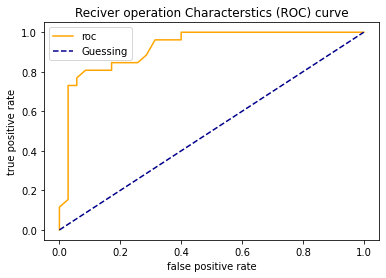

In [68]:
#create a function for plotting roc curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr,tpr):
    """ 
    Plots a ROC curve given the fpr and tpr
    """
    
    #plot roc curve
    plt.plot(fpr,tpr,color='orange',label='roc')
    #plot line with no prediction power (baseline)
    plt.plot([0,1],[0,1],color='darkblue', linestyle='--',label='Guessing' )
    
    #customizing the plot 
    plt.xlabel('false positive rate')
    plt.ylabel('true positive rate')
    plt.title('Reciver operation Characterstics (ROC) curve')
    plt.legend()
plot_roc_curve(fpr,tpr)

In [69]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_prob_positive)

0.9225274725274725

**confusion matrix**

A confusion matrix is a quick way to compare the label of a model predicts and the actual label it was supposed to predict

In essence , giving you an idea where the model gets confused

<img src='images/confusionMatrix.jpeg'>

In [70]:
from sklearn.metrics import confusion_matrix
y_preds = clf.predict(x_test)
confusion_matrix(y_test,y_preds)

array([[25, 10],
       [ 3, 23]], dtype=int64)

In [71]:
#visualise confusion matrics with pd.crosstab()
pd.crosstab(y_test,
            y_preds,
            rownames=['predicted lable'],
            colnames=['actual lable'])

actual lable,0,1
predicted lable,,
0,25,10
1,3,23


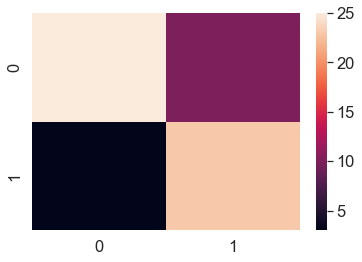

In [72]:
#Make our confusion matrics more visualise seaborn heatmap()
import seaborn as sns

#set the font scale 
sns.set(font_scale=1.5)

#create a confusion matrix
conf_mat = confusion_matrix(y_test,y_preds)

#plot is using seaborn
sns.heatmap(conf_mat);

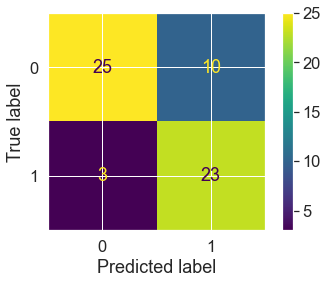

In [73]:
#confusion matrix with sklearn
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_true=y_test,y_pred=y_preds);

In [74]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.71      0.79        35
           1       0.70      0.88      0.78        26

    accuracy                           0.79        61
   macro avg       0.79      0.80      0.79        61
weighted avg       0.81      0.79      0.79        61



### Regression model evaluation matrix

1. R^2 (r-squared ) or coffecient of determination 
2. Mean absoluter error (MAE)
3. Mean squared error (MSE)


In [75]:
from sklearn.ensemble import RandomForestRegressor

x = housing_pd.drop('MedHouseVal',axis=1)
y = housing_pd['MedHouseVal']

x_train, x_test , y_train,y_test = train_test_split(x,y,test_size=0.2)

model = RandomForestRegressor()
model.fit(x_train,y_train)
model.score(x_test,y_test)


0.8196244449760408

In [76]:
#R^2 score 
from sklearn.metrics import r2_score

#fill array with y_test mean 
y_test_mean = np.full(len(y_test),y_test.mean())
y_test_mean

array([2.07136578, 2.07136578, 2.07136578, ..., 2.07136578, 2.07136578,
       2.07136578])

In [77]:
r2_score(y_true=y_test,y_pred=y_test_mean)

-2.220446049250313e-16

### Mean absolute error (MAE)
MAE is the average of the absolute difference between prediction and actual_error
it gives you a idea of how wrong your model predictions are

In [78]:
#MAE
from sklearn.metrics import mean_absolute_error

y_pred = model.predict(x_test)
mae = mean_absolute_error(y_test,y_pred)
mae

0.3184124298691863

In [79]:
#Mean absolute error
df = pd.DataFrame(data={'actual_values': y_test,
                        'predicted_values': y_pred})

df['difference'] = df['actual_values'] - df['predicted_values']
df

,actual_values,predicted_values,difference
14819,0.930,0.95746,-0.02746
17907,2.614,2.42887,0.18513
5385,3.667,3.05133,0.61567
11816,2.128,1.69745,0.43055
2335,0.789,0.92238,-0.13338
...,...,...,...
2779,0.250,1.10406,-0.85406
592,2.525,2.92894,-0.40394
16443,1.135,1.13609,-0.00109
15083,1.241,1.20982,0.03118


In [80]:
np.abs(df['difference']).mean() #mae

0.31841242986918544

***Mean squared squared***


In [81]:
from sklearn.metrics import mean_squared_error

y_preds = model.predict(x_test)
mse = mean_squared_error(y_test,y_preds)
mse

0.24099120970314294

In [82]:
#Mean squared error
df = pd.DataFrame(data={'actual_values': y_test,
                        'predicted_values': y_pred})

df['difference'] = np.square(df['actual_values'] - df['predicted_values'])
df

,actual_values,predicted_values,difference
14819,0.930,0.95746,0.000754
17907,2.614,2.42887,0.034273
5385,3.667,3.05133,0.379049
11816,2.128,1.69745,0.185373
2335,0.789,0.92238,0.017790
...,...,...,...
2779,0.250,1.10406,0.729419
592,2.525,2.92894,0.163168
16443,1.135,1.13609,0.000001
15083,1.241,1.20982,0.000972


In [83]:
df['difference'].mean() #mean squared error

0.24099120970314225

### Using the scoring parameter

In [84]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

x = heart_disease.drop(['target'],axis = 1)
y = heart_disease['target']

clf = RandomForestClassifier()

In [85]:
#cross-validation accuracy
cv_acc = cross_val_score(clf, x,y, cv = 5,scoring=None) #if scoring is None , estimator's default scoring evaluation metrics is used ie (Accuracy)
cv_acc


array([0.80327869, 0.86885246, 0.83606557, 0.85      , 0.78333333])

In [86]:
#cross validation accracy 
print(f'the cross validated accuracy is: {np.mean(cv_acc)*100:.2f}%')

the cross validated accuracy is: 82.83%


In [87]:
#precision 
cv_precision = cross_val_score(clf, x,y, cv = 5,scoring='precision')
cv_precision

array([0.82857143, 0.90322581, 0.86206897, 0.81818182, 0.73684211])

In [88]:
print(f'the cross validated accuracy is: {np.mean(cv_precision)*100:.2f}%')

the cross validated accuracy is: 82.98%


In [89]:
#recall
cv_recall = cross_val_score(clf, x,y, cv = 5,scoring='precision')
cv_recall

array([0.82352941, 0.93103448, 0.81818182, 0.84375   , 0.75675676])

In [90]:
print(f'the cross validated accuracy is: {np.mean(cv_recall)*100:.2f}%')

the cross validated accuracy is: 83.47%


lets use scoring parameters on regression model 

In [91]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

x = housing_pd.drop('MedHouseVal',axis=1)
y = housing_pd['MedHouseVal']

model = RandomForestRegressor()

In [92]:
cv_r2  = cross_val_score(model,x,y,cv = 5,scoring = None)
cv_r2

array([0.51958946, 0.7036643 , 0.74185467, 0.61410624, 0.68080448])

In [93]:
#mean absolute error
cv_mae = cross_val_score(model,x,y,cv = 3,scoring='neg_mean_absolute_error')
cv_mae

array([-0.51177929, -0.42058345, -0.50845436])

In [94]:
#mean squared error
cv_mse = cross_val_score(model,x,y,cv = 3,scoring='neg_mean_squared_error')
cv_mse

array([-0.51374216, -0.32792204, -0.53777473])

### using different evaluation metrics

In [97]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Create X & y
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create model
clf = RandomForestClassifier()

# Fit model
clf.fit(X_train, y_train)

# Make predictions
y_preds = clf.predict(X_test)

# Evaluate model using evaluation functions
print("Classifier metrics on the test set")
print(f"Accurracy: {accuracy_score(y_test, y_preds)*100:.2f}%")
print(f"Precision: {precision_score(y_test, y_preds)}")
print(f"Recall: {recall_score(y_test, y_preds)}")
print(f"F1: {f1_score(y_test, y_preds)}")

Classifier metrics on the test set
Accurracy: 75.41%
Precision: 0.7027027027027027
Recall: 0.8666666666666667
F1: 0.7761194029850748


In [100]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Create X & y
X = housing_pd.drop("MedHouseVal", axis=1)
y = housing_pd["MedHouseVal"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create model
model = RandomForestRegressor()

# Fit model
model.fit(X_train, y_train)

# Make predictions
y_preds = model.predict(X_test)

# Evaluate model using evaluation functions
print("Regression metrics on the test set")
print(f"R2 score: {r2_score(y_test, y_preds)}")
print(f"MAE: {mean_absolute_error(y_test, y_preds)}")
print(f"MSE: {mean_squared_error(y_test, y_preds)}")


Regression metrics on the test set
R2 score: 0.8065734772187598
MAE: 0.32659871732073664
MSE: 0.2534678520824551


## Improving our model

Three ways to adjust hyperparameters
1. By hand
2. Randomly with randomsearchcv
3. Exhaustively with gridsearchcv

### Tuning hyperparameters by hand
let's create 3 sets training , validation , test

In [102]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

we're going to adgust
* 'max_depth'
* 'max_features'
* 'min_samples_leaf'
* 'min_samples_split'
* 'n_estimators'

In [123]:
def evaluate_preds(y_true,y_preds):
    """
     performs evaluation coparison on y_true value and y_preds labels
    """
    accuracy = accuracy_score(y_true,y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true,y_preds)
    f1 = f1_score(y_true,y_preds)
    
    metric_dict = {'accuracy': round(accuracy,2),
                   'precision': round(precision,2),
                    'recall' : round(recall,2),
                    'f1' : round(f1,2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")
    
    return metric_dict

In [124]:
from sklearn.ensemble import RandomForestClassifier

#shuffle the data
heart_disease_shuffled = heart_disease.sample(frac=1)

#shuffle into x & y
x = heart_disease_shuffled.drop('target',axis = 1)
y = heart_disease_shuffled['target']

#split the data into train , vlidation and test sets
train_split = round(0.7 * len(heart_disease_shuffled))
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled))
x_train, y_train = x[:train_split], y[:train_split]
x_valid , y_valid = x[train_split:valid_split] , y[train_split:valid_split]
x_test, y_test =  y[valid_split:] , y[valid_split:]

clf = RandomForestClassifier()
clf.fit(x_train,y_train)

#make baseline predictions
y_preds = clf.predict(x_valid)

#Evaluate the classfier on validtion set 
baseline_metrices = evaluate_preds(y_valid, y_preds)
baseline_metrices

Acc: 84.44%
Precision: 0.81
Recall: 0.92
F1 score: 0.86


{'accuracy': 0.84, 'precision': 0.81, 'recall': 0.92, 'f1': 0.86}

In [133]:
#create a second classifier with different hyperparameter
clf = RandomForestClassifier(n_estimators=10,max_depth=10)
clf.fit(x_train,y_train)

#make baseline predictions
y_preds = clf.predict(x_valid)

#Evaluate the classfier on validtion set 
baseline_metrices = evaluate_preds(y_valid, y_preds)
baseline_metrices


Acc: 82.22%
Precision: 0.81
Recall: 0.88
F1 score: 0.84


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.84}